# Numerical exercises 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from tensorflow.keras.datasets import mnist

import matplotlib.style as style 
style.use('tableau-colorblind10')

# Exercise 12.1
## Recognizing hand-written digits with DNN

The goal of this exercise is to exploit a DNN in order to recognized hand-written digits. To do so we will train it on the `minst` database, where each _data_ is a 28x28 png grayscale image. 

We will use the `Sequential()` model, with the `relu` activation function for the hidden layers but we set the output layer to be activated with `softmax`, which converts a vector of values to a probability distribution, in our case corresponding to the probability distributions for each of the digits. 

As optimizer we will try out:
- Stochastic Gradient Descent (SDG);
- Adam;
- Adadelta.

We will try out the model and calculate accuracy and loss.

Let's start with SDG.

In [2]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

11493376/11490434 [==============================] - 4s 0us/step
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [5]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

def train_model(opt):
    model = compile_model(opt)
    history = model.fit(X_train, Y_train,
          batch_size=batch_size, epochs=epochs,
          verbose=0, shuffle=True,   
          validation_data=(X_test, Y_test))
    return model, history

Model architecture created successfully!
Model compiled successfully and ready to be trained.


In [6]:
batch_size = 32; 
epochs = 10;

model, history = train_model(SGD())

2021-09-13 20:34:12.830836: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-13 20:34:12.957375: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-13 20:34:12.975994: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


In [7]:
def plot_perf(model):
    score = model.evaluate(X_test, Y_test, verbose=1)
    # print performance
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

def plot_hist(history):
    plt.figure(figsize=(15,4)); sub=1
    for fc in ('accuracy','loss'):
        plt.subplot(1,2,sub)
        plt.plot(history.history[fc])
        plt.plot(history.history['val_'+fc])
        plt.ylabel('model '+fc)
        plt.xlabel('epoch')
        plt.grid()
        plt.legend(['train', 'test'], loc='best')
        sub+=1
    plt.show()

313/313 [==============================] - 0s 689us/step - loss: 0.1089 - accuracy: 0.9654

Test loss: 0.1088775172829628
Test accuracy: 0.965399980545044


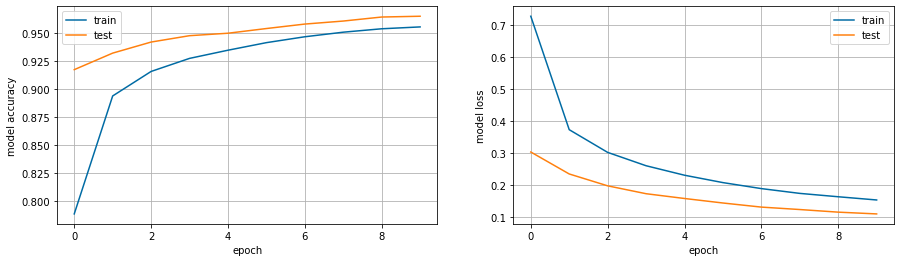

In [8]:
plot_perf(model)
plot_hist(history)

In [9]:
def predictions(model):
    pred = model.predict(X_test)

    X_test_ = X_test.reshape(X_test.shape[0], img_rows, img_cols)
    plt.figure(figsize=(15, 15)) 
    for i in range(10):    
        ax = plt.subplot(1, 10, i + 1)    
        plt.imshow(X_test_[i, :, :], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(pred[i])))    
        plt.axis('off') 
    plt.show()

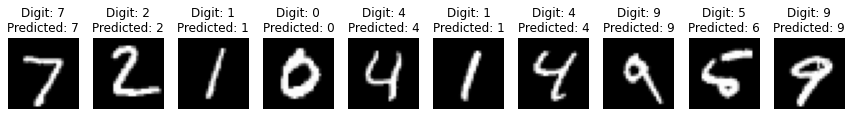

In [10]:
predictions(model)

The results are good; our DNN was able to identify 9/10 digits. Also the final loss value is very good, and we are most likely avoiding overfitting the data because the validation loss value is lower than the train one.

We now proceed with utilizing the Adam optimizer.

In [11]:
model_adam, history_adam = train_model(Adam())

313/313 [==============================] - 0s 679us/step - loss: 0.0886 - accuracy: 0.9814

Test loss: 0.0886368378996849
Test accuracy: 0.9814000129699707


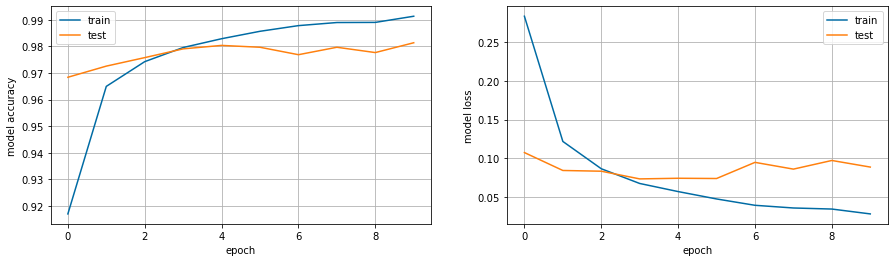

In [12]:
plot_perf(model_adam)
plot_hist(history_adam)

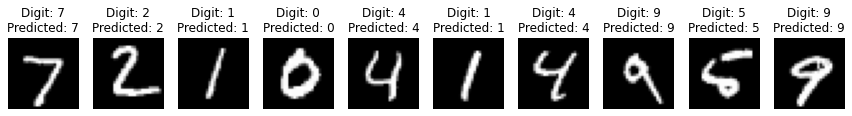

In [14]:
predictions(model_adam)

In this case the results shows perfect match, but the train loss value is lower than the test, possibly meaning that we overfitted the data.

We try now with the Adadelta optimizer.

In [15]:
model_del, history_del = train_model(Adadelta())

313/313 [==============================] - 0s 790us/step - loss: 0.9216 - accuracy: 0.8352

Test loss: 0.9216423034667969
Test accuracy: 0.8352000117301941


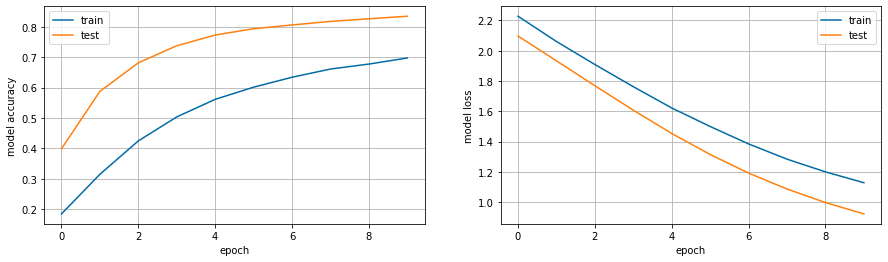

In [16]:
plot_perf(model_del)
plot_hist(history_del)

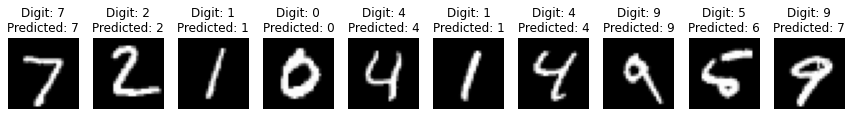

In [17]:
predictions(model_del)

In this case the result are the worst among all; "only" 8/10 matches, and the accuracy is lower than the two previous cases.

# Exercise 12.2
## Recognizing hand-written digits with a CNN

We will try now to tackle the same problem using a Convolotional Neural Network, which operates differetly from a DNN.

In [18]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [19]:
def create_CNN():
    # instantiate model
    model = Sequential([
    # layer with 10 filters (dimensionality of output space)
    keras.layers.Conv2D(10, kernel_size=(5, 5), 
                        input_shape=input_shape, 
                        activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(3, 3)),
    keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.5),
    # soft-max layer
    keras.layers.Dense(num_classes, activation='softmax')
    ])
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [20]:
# training parameters
batch_size = 32
epochs = 10

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0542 - accuracy: 0.9809

Test loss: 0.05418023839592934
Test accuracy: 0.98089998960495


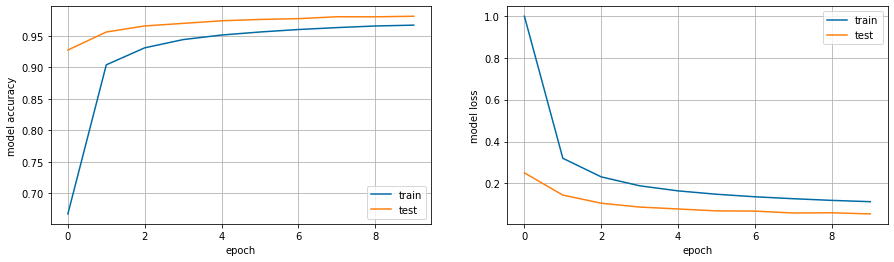

In [21]:
plot_perf(model_CNN)
plot_hist(history)

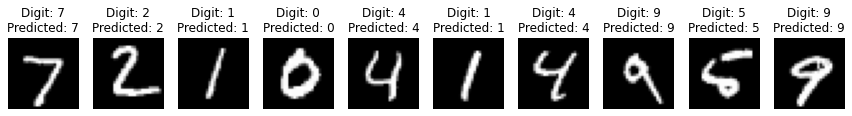

In [22]:
predictions(model_CNN)

The results shows a 10/10 match, with an accuracy of $98\%$ and the lowest loss value compared with the ones obtained using a DNN. 

# Exercise 12.3
## Recognizing my hand-written digits with a CNN

We will now use the previous tested CNN to recognize my hand-written digits, in order to test it on unknown data. 

In [23]:
for k in range(10):
    digit_filename = str(k)+'.png'
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255

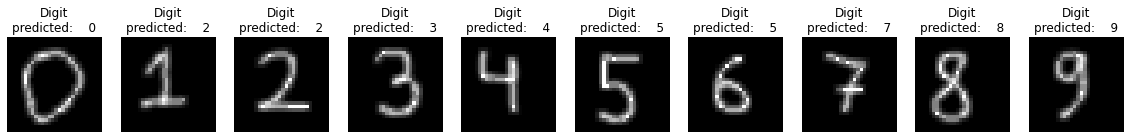

In [24]:
plt.figure(figsize=(20, 3))  
for k in range(10):
    digit_filename = str(k)+'.png'
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255


    data = data.reshape(1,xdim,ydim,1)
    pred_0 = model_CNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.subplot(1,10,k+1)
    plt.imshow(data, cmap='gray')    
    plt.title("Digit\npredicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
plt.show()

The results obtained are pretty good; the misclassification of the number one is probably due to the fact that i draw differently from the one in the training dataset, but that and the six wrongly predicted, all the other one are perfect.